In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("seguranca.csv" , sep =";", decimal =",", encoding = "UTF-8")
df

,LATITUDE,LONGITUDE,TIPO,QUANTIDADE,RADIUS
0,-25.669612,-49.306619,PATRIMONIO,5,0.05
1,-25.669612,-49.306619,VIDA,3,0.03
2,-25.666931,-49.304673,PATRIMONIO,14,0.14
3,-25.666931,-49.304673,VIDA,4,0.04
4,-25.653447,-49.308920,PATRIMONIO,8,0.08
...,...,...,...,...,...
1996,-25.353371,-49.266524,PATRIMONIO,13,0.13
1997,-25.352895,-49.234316,VIDA,4,0.04
1998,-25.352489,-49.243033,VIDA,8,0.08
1999,-25.351102,-49.234356,VIDA,5,0.05


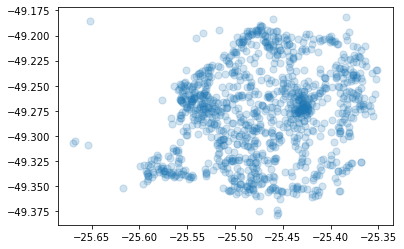

In [3]:
df = df.loc[(df['TIPO'].str.contains('VIDA' , na=False))]

X = np.array(df)
plt.scatter(X[:,0], X[:,1], alpha=0.2, s=50)

m = folium.Map(location=[df.LATITUDE.mean(), df.LONGITUDE.mean()], zoom_start=13, 
               tiles='OpenStreet Map')
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row.LATITUDE, row.LONGITUDE],
        radius=row.RADIUS,
        color='#8B0000',
        fill=True,
        fill_colour='#8B0000',
        opacity = row.RADIUS*10
    ).add_to(m)

m.save("seguranca.html")

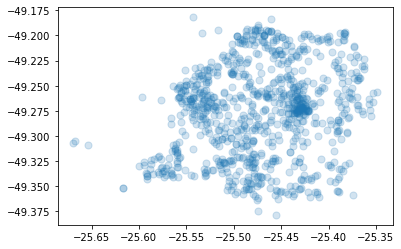

In [15]:
df = pd.read_csv("seguranca.csv" , sep =";", decimal =",", encoding = "UTF-8")
df = df.loc[(df['TIPO'].str.contains('PATRIMONIO' , na=False))]

X = np.array(df)
plt.scatter(X[:,0], X[:,1], alpha=0.2, s=50)

m = folium.Map(location=[df.LATITUDE.mean(), df.LONGITUDE.mean()], zoom_start=13, 
               tiles='OpenStreet Map')
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row.LATITUDE, row.LONGITUDE],
        radius=row.RADIUS,
        color='black',
        fill=True,
        fill_colour='black',
        opacity = row.RADIUS*10,
    ).add_to(m)

m

In [12]:
df = df.groupby(
     ['LATITUDE','LONGITUDE','TIPO']
 ).agg(
     sum_col3 = ('QUANTIDADE','sum'),
 ).reset_index()

df
df.to_csv("teste.csv" , index = False , decimal=',' , sep=';' , encoding="UTF-8")

#df['RADIUS'] = df['QUANTIDADE'] / 10